## Apply best model to Telegram examples messages

Using the same example messages which were taken for the qualitative exploration of spacy and Flair.

## Load pretrained model

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

best_model_path = "../../../../models/xlm-roberta-base-sm_tg_combined-10_epochs_2022_07_10/checkpoint-1698"
pretrained_tokenizer = AutoTokenizer.from_pretrained(best_model_path,local_files_only=True)
pretrained_model = AutoModelForTokenClassification.from_pretrained(best_model_path,local_files_only=True)

## Initialize NER pipeline with pretrained model and 

In [3]:
from transformers import pipeline

ner_pipe = pipeline('ner', model=pretrained_model, tokenizer=pretrained_tokenizer, device=0)

# Load Telegram messages 

In [32]:
import pandas as pd

df = pd.read_csv('/home/eli/data/data_for_annotation_2022_06_27.csv')

## Apply pipeline to sample messages to get NER predictions

In [33]:
df['detected_entities'] = df.cleaned_text.apply(lambda x: ner_pipe(x))

/home/eli/envs/bt/lib/python3.8/site-packages/transformers/pipelines/base.py:1012: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


## Explore results

The pipeline returns the model's prediction for each subtoken:

In [34]:
idx = 5
print(f"TEXT: {df.loc[idx, 'cleaned_text']}\n\nDETECTED ENTITIES: {df.loc[idx, 'detected_entities']}")

TEXT: Stuttgart Dobelstrasse 11.8.2021 Schilderaktion Raus auf die Straße @Demotermine!

DETECTED ENTITIES: [{'entity': 'B-LOC', 'score': 0.9981779, 'index': 1, 'word': '▁Stuttgart', 'start': 0, 'end': 9}, {'entity': 'B-LOC', 'score': 0.9910252, 'index': 2, 'word': '▁Do', 'start': 10, 'end': 12}, {'entity': 'B-LOC', 'score': 0.84913296, 'index': 3, 'word': 'bel', 'start': 12, 'end': 15}, {'entity': 'I-LOC', 'score': 0.74449015, 'index': 4, 'word': 'stra', 'start': 15, 'end': 19}, {'entity': 'I-LOC', 'score': 0.958969, 'index': 5, 'word': 'sse', 'start': 19, 'end': 22}, {'entity': 'B-DATE', 'score': 0.9719544, 'index': 6, 'word': '▁11', 'start': 23, 'end': 25}, {'entity': 'I-DATE', 'score': 0.8926747, 'index': 7, 'word': '.8.', 'start': 25, 'end': 28}, {'entity': 'I-DATE', 'score': 0.8711642, 'index': 8, 'word': '2021', 'start': 28, 'end': 32}, {'entity': 'B-ACTION', 'score': 0.9693161, 'index': 9, 'word': '▁Schi', 'start': 33, 'end': 37}, {'entity': 'B-ACTION', 'score': 0.9620396, 'ind

### Save results

In [35]:
#df.to_csv('roberta_new_texts_results.csv')

In [36]:
df = pd.read_csv('roberta_new_texts_results.csv')

In [37]:
df[['date', 'cleaned_text', 'detected_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  
0     [{'entity': 'B-LOC', 'score': 0.84232426, 'ind...  
1     [{'entity': 'B-LOC', 'score': 0.9907594, 'inde...  
2     [{'entity': 'B-ACTION', 'score': 0.7361625, 'i...  
3     [{'entity': 'B-LOC', 'score': 0.9971794, 'inde...  
4     [{'entity': 'B-LOC', 'score': 0.99839383, 'ind...  
...                                                 ...  
3629  [{'entity': 'B-ACTION', 'score': 0.9472689, 'i...  
3630  [{'entity': 'B-DATE', 'score': 0.9678361, 'ind...  
3631  [{'entity': 'B-LOC', 'score': 0.9867849, 'inde...  
3632  [{'entity': 'B-DATE', 'score': 0.9619465, 'ind...  
3633  [{'entity': 'B-LOC', 'score': 0.9930601, 'inde...  

[3634 rows x 3 columns]

#### Explore results for one example row

In [38]:
import ast

pd.DataFrame(ast.literal_eval(df.loc[3629, 'detected_entities']))

entity     score  index        word  start  end
0   B-ACTION  0.947269      4       ▁Auto      6   10
1   B-ACTION  0.731370      5       corso     10   15
2      B-LOC  0.904917      6        ▁Wit     16   19
3      I-LOC  0.512995      7     tenberg     19   26
4     B-DATE  0.981052     13    ▁Samstag     35   42
5     I-DATE  0.958456     14           ▁     43   44
6     I-DATE  0.956032     15           ,     43   44
7     I-DATE  0.950157     16        ▁den     45   48
8     I-DATE  0.924333     17         ▁15     49   51
9     I-DATE  0.951490     18        .05.     51   55
10    I-DATE  0.937067     19        2021     55   59
11    B-TIME  0.946448     22      ▁16:30     62   67
12    I-TIME  0.970456     23        ▁Uhr     68   71
13     B-LOC  0.991811     24      ▁Haupt     72   77
14     B-LOC  0.933637     25        bahn     77   81
15     I-LOC  0.752460     26         hof     81   84
16     I-LOC  0.910386     27        ▁Ost     85   88
17     I-LOC  0.974290     28  ▁Parkplatz     89   98
18    B-TIME  0.929949     33      ▁17:30    110  115
19    I-TIME  0.963147     34        ▁Uhr    116  119
20  B-ACTION  0.495568     41        ▁Fly    131  134
21  B-ACTION  0.862761     47        Auto    146  150
22     B-LOC  0.940126     49           W    155  156
23     B-LOC  0.891918     50          it    156  158
24     B-LOC  0.628423     51     tenberg    158  165
25     B-LOC  0.976755     64           S    187  188
26     B-LOC  0.894461     65         ach    188  191
27     I-LOC  0.463144     66         sen    191  194
28     I-LOC  0.574323     67      Anhalt    194  200
29    B-DATE  0.976433     70        ▁150    209  212
30    I-DATE  0.896175     71           5    212  213
31    I-DATE  0.906057     72        2021    213  217

In [39]:
pd.DataFrame(ast.literal_eval(df.loc[0, 'detected_entities']))

entity     score  index word  start  end
0  B-LOC  0.842324     17    S     57   58
1  B-LOC  0.878931     18  tut     58   61
2  I-LOC  0.728117     19    t     61   62
3  I-LOC  0.845152     20  gar     62   65
4  I-LOC  0.732687     21    t     65   66

### Method to adjust tagging, concatenate subtokens back to full tokens with their corresponding labels

In [28]:
def adjust_tagging(ner_results):
    
    # TODO: check score for B, treshold, e.g. remove all rows with treshold <= 0.7?
    # TODO: prevent ents to start with I? 

    ents_df = pd.DataFrame(ast.literal_eval(ner_results)) #
    tags = []
    words = []
    result = []
    entity_started = False

    
    for i in range(len(ents_df)):   
        
        prev_word = '' if i == 0 else ents_df.loc[i-1, 'word']
        prev_tag = '' if i == 0 else ents_df.loc[i-1, 'entity']

        curr_word = ents_df.loc[i, 'word']
        curr_tag = ents_df.loc[i, 'entity']            
        
        # adjust tagging for first word
        if i == 0 and curr_tag.startswith('I'):
            curr_tag = curr_tag.replace('I', 'B')
            
        # if subtoken is tagged as beginning of an entity, change to inside of an entity
        if curr_word.startswith('▁') and curr_tag.startswith('B'):
            curr_tag = curr_tag.replace('B', 'I')
        
        # B = beginning of an entity -> store tag and first word of entity in words list
        if curr_tag.startswith('B'):
            tags.append(curr_tag.replace('B-', ''))
            words.append(curr_word)
            entity_started = True

        # I = curr word is inside of an entity -> get preceding word, combine with current word and store in words list
        if curr_tag.startswith('I') and entity_started:
            # remove ## added by tokenizer to obtain clean subtoken
            pred_word = words[-1]
            
            if '▁' in curr_word:
                curr_word = curr_word.replace('▁', '')
            elif curr_word[0].isupper():
                # to separate words in multi-word NEs, e.g. Jens Spahn
                curr_word = ' ' + curr_word
                
            word_to_add = pred_word + curr_word
            words[-1] = word_to_add

        result = zip(words, tags)
    
    return list(result)

In [29]:
df['detected_entities'] = df.detected_entities.apply(lambda x: adjust_tagging(x))

In [30]:
df[['date', 'cleaned_text', 'detected_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  
0                           [(S, LOC), (tuttgart, LOC)]  
1     [(Cre, LOC), (mona#, LOC), (IT#, LOC), (Sa2711...  
2     [(Kar, ACTION), (ls#, ACTION), (B W# Mo2012#, ...  
3                                                    []  
4                                [(ßburg18092021, LOC)]  
...                                                 ...  
3629  [(corsoWittenbergSamstag,den15.05.202116:30Uhr...  
3630                               [(Württemberg, LOC)]  
3631  [(S, LOC), (tuttgartanderUniSchi, LOC), (lder,...  
3632                                  [(ü1:26:40, LOC)]  
3633                                                 []  

[3634 rows x 3 columns]

## Parse date and time entities using ctparse

In [40]:
from ctparse import ctparse
from datetime import datetime


def parse_entities(detected_ents):
# https://ctparse.readthedocs.io/en/latest/ctparse.html#module-ctparse.types

    parsed_ents = []

    # Set timestamp of message as reference time
    #ts = df.loc[i, 'date']
    
    for ent in detected_ents:
        token, tag = ent
        #print(token, tag)
        
        if not (tag == 'DATE' or tag =='TIME'):
            parsed_ents.append((token, tag))
        
        else:
            #print(token)
            try: 
                parsed_date_time = ctparse(token)#, ts=ts)
                
                #print(parsed_date_time is not None)
                if tag == 'DATE': 
                    parsed_token = parsed_date_time.resolution.dt.strftime("%d.%m.%Y")
                elif tag == 'TIME':
                    parsed_token = parsed_date_time.resolution.dt.strftime("%HH:%MM")
                
                parsed_ents.append((parsed_token, tag))
           
            except: 
                parsed_ents.append((token, tag))
        
    #print(parsed_ents)
    return parsed_ents

In [42]:
#df['parsed_entities'] = df.detected_entities.apply(lambda x: parse_entities(x))

In [30]:
df[['date', 'cleaned_text', 'detected_entities', 'parsed_entities']]

date                                       cleaned_text  \
0     2020-11-24 13:22:54  Corona-Maßnahmen sofort beenden , Existenzen e...   
1     2021-11-24 13:05:10  #Cremona #IT #Sa2711 Raus auf die Straßen @Dem...   
2     2021-12-14 22:31:13  #Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus a...   
3     2021-07-21 00:04:38  Bristol 01082021 Overview https://t.me/Demoter...   
4     2021-09-15 04:51:29  Straßburg @ElsassInfoChat 18092021 Raus auf di...   
...                   ...                                                ...   
3629  2021-05-11 06:39:25  + + + Autocorso Wittenberg + + + 🚗 Samstag , d...   
3630  2021-12-08 11:40:27  Finger weg vom Ländle ! Am Samstagmorgen prote...   
3631  2021-10-16 11:23:58  #Stuttgart an der Uni Schilderdemo der Freien ...   
3632  2021-12-18 11:40:11  18.12.2021 Jülich - 242 - Gemeinsaum mehr erre...   
3633  2021-09-27 18:50:21  Ex General : „ Frankreich ist Opfer des U Boot...   

                                      detected_entities  \
0                          [(@, LOC), (Stuttgart, LOC)]   
1                            [(#, LOC), (Cremona, LOC)]   
2     [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]   
3                                                    []   
4                                    [(Straßburg, LOC)]   
...                                                 ...   
3629  [(Wittenberg, LOC), (Samstag,den15.05.2021, DA...   
3630  [(L, LOC), (Samstagmorgen, DATE), (Heidelberg,...   
3631  [(#, LOC), (Stuttgart, LOC), (Freien Linken, O...   
3632  [(18.12.2021, DATE), (Jülich, LOC), (1, TIME),...   
3633  [(Ex General, ORG), (Frankreich, LOC), (Epoch ...   

                                        parsed_entities  
0                          [(@, LOC), (Stuttgart, LOC)]  
1                            [(#, LOC), (Cremona, LOC)]  
2     [(#, LOC), (Karlsruhe, LOC), (#, LOC), (BW, LOC)]  
3                                                    []  
4                                    [(Straßburg, LOC)]  
...                                                 ...  
3629  [(Wittenberg, LOC), (15.05.2021, DATE), (16H:3...  
3630  [(L, LOC), (30.07.2022, DATE), (Heidelberg, LO...  
3631  [(#, LOC), (Stuttgart, LOC), (Freien Linken, O...  
3632  [(18.12.2021, DATE), (Jülich, LOC), (01H:00M, ...  
3633  [(Ex General, ORG), (Frankreich, LOC), (Epoch ...  

[3634 rows x 4 columns]

## Get results per text

In [31]:
for i in df[:10].index:
    print(f"TEXT:{df.loc[i, 'cleaned_text']}\nENTITIES:{df.loc[i, 'parsed_entities']}'\n\n")

TEXT:Corona-Maßnahmen sofort beenden , Existenzen erhalten ! @StuttgartGrundgesetzdemos @Corona_Reset
ENTITIES:[('@', 'LOC'), ('Stuttgart', 'LOC')]'


TEXT:#Cremona #IT #Sa2711 Raus auf die Straßen @Demotermine! 👉 Übersicht / Overview 👈
ENTITIES:[('#', 'LOC'), ('Cremona', 'LOC')]'


TEXT:#Karlsruhe #BW #Mo2012 #Mo2712 #montags Raus auf die Straßen @Demotermine! 👉 Übersicht / Overview 👈
ENTITIES:[('#', 'LOC'), ('Karlsruhe', 'LOC'), ('#', 'LOC'), ('BW', 'LOC')]'


TEXT:Bristol 01082021 Overview https://t.me/Demotermine/12847 Raus auf die Straße @Demotermine!
ENTITIES:[]'


TEXT:Straßburg @ElsassInfoChat 18092021 Raus auf die Straßen @Demotermine
ENTITIES:[('Straßburg', 'LOC')]'


TEXT:Stuttgart Dobelstrasse 11.8.2021 Schilderaktion Raus auf die Straße @Demotermine!
ENTITIES:[('Stuttgart', 'LOC'), ('Dobelstrasse', 'LOC'), ('11.08.2021', 'DATE')]'


TEXT:🇫 🇷 Paris Anspannung steigt 11.9.2021 @FranceResistanceNews Raus auf die Straßen @Demotermine
ENTITIES:[('Paris', 'LOC'), ('11.09.2021', 

## Get tokens per entity type

In [35]:
from collections import Counter 

def get_entities_and_entity_freqs_per_type(df):
    # dict to store words per entity type
    ents_per_type = {
    'LOC': [],
    'DATE': [],
    'TIME': [],
    'PER': [],
    'ACTION': [],
    'ORG': [],
    }

    words = []
    tags = []

    for i in df.index: 
        ents = df.loc[i, 'parsed_entities']

        for ele in ents:
            word, tag = ele
            words.append(word)
            tags.append(tag)

            # store in results dict, only keep words with at least 2 characters to remove unusable results
            if len(word) > 1:
                ents_per_type[tag].append(word)
    
    freqs = Counter(tags)
    return ents_per_type, freqs

In [36]:
ents_per_type, freqs = get_entities_and_entity_freqs_per_type(df)

In [37]:
freqs

Counter({'LOC': 13656, 'DATE': 2453, 'ORG': 1926, 'TIME': 3973, 'PER': 1513})

In [39]:
#ents_per_type

In [42]:
Counter(sorted(ents_per_type['LOC'])).most_common(20)

[('DE', 636),
 ('Berlin', 572),
 ('Stuttgart', 241),
 ('Bayern', 142),
 ('Deutschland', 140),
 ('München', 116),
 ('Nürnberg', 116),
 ('Wien', 115),
 ('Sachsen', 90),
 ('Dresden', 84),
 ('Leipzig', 80),
 ('Hamburg', 72),
 ('Österreich', 71),
 ('Schweiz', 70),
 ('Baden', 65),
 ('Rostock', 65),
 ('Augsburg', 64),
 ('Niedersachsen', 60),
 ('Düsseldorf', 59),
 ('Frankfurt', 56)]

In [43]:
Counter(sorted(ents_per_type['PER'])).most_common(20)

[('Karl Hilz', 26),
 ('Merkel', 25),
 ('Kretschmer', 23),
 ('Scholz', 15),
 ('Karl', 14),
 ('Nicole Hammer', 14),
 ('Spahn', 14),
 ('Sven Liebich', 14),
 ('Markus Haintz', 13),
 ('Ralf Ludwig', 13),
 ('Alexander Ehrlich', 12),
 ('Michael Ballweg', 12),
 ('Cor', 10),
 ('Jens Spahn', 10),
 ('Olaf Scholz', 9),
 ('Sabine Seibold', 9),
 ('Söder', 9),
 ('Laschet', 8),
 ('MarcoKurz', 8),
 ('Markus Huck B. P.', 8)]

In [46]:
Counter(sorted(ents_per_type['ORG'])).most_common(20)

[('Teleg', 130),
 ('Facebook', 55),
 ('Twitter', 44),
 ('YouTube', 31),
 ('CDU', 28),
 ('SPD', 28),
 ('Epoch Times Nachrichten', 27),
 ('Cor', 26),
 ('AfD', 21),
 ('Instagram', 18),
 ('Freie Jugend', 14),
 ('Baden', 11),
 ('Epoch Times', 11),
 ('ARD', 10),
 ('Pay', 10),
 ('Grünen', 9),
 ('Anti', 8),
 ('Bundesver', 8),
 ('Freiejugend', 8),
 ('Google', 8)]

In [44]:
Counter(sorted(ents_per_type['DATE'])).most_common(20)

[('30.07.2022', 120),
 ('01.08.2022', 103),
 ('28.07.2022', 93),
 ('29.07.2022', 68),
 ('31.07.2022', 63),
 ('29.08.2021', 45),
 ('04.08.2022', 42),
 ('2021', 40),
 ('03.08.2022', 38),
 ('28.08.2021', 35),
 ('01.08.2021', 34),
 ('04.12.2021', 25),
 ('02.08.2022', 24),
 ('20.11.2021', 23),
 ('06.12.2022', 21),
 ('06.11.2021', 19),
 ('27.11.2021', 17),
 ('28.08.2022', 17),
 ('11.12.2021', 16),
 ('18.09.2021', 16)]

In [45]:
Counter(sorted(ents_per_type['TIME'])).most_common(20)

[('18H:00M', 578),
 ('19H:00M', 545),
 ('15H:00M', 307),
 ('14H:00M', 296),
 ('17H:00M', 268),
 ('15H:30M', 173),
 ('16H:00M', 155),
 ('13H:00M', 135),
 ('18H:30M', 115),
 ('00H:00M', 113),
 ('11H:00M', 98),
 ('12H:00M', 90),
 ('17H:30M', 89),
 ('10H:00M', 86),
 ('01H:00M', 79),
 ('14H:30M', 65),
 ('02H:00M', 62),
 ('03H:00M', 44),
 ('16H:30M', 33),
 ('04H:00M', 32)]

In [47]:
Counter(sorted(ents_per_type['ACTION'])).most_common(20)

[]

# Wordclouds per entity type

In [69]:
from os import path
import numpy as np
from wordcloud import WordCloud
from collections import Counter 
from PIL import Image
import matplotlib.pyplot as plt

# read the mask image, taken from https://www.vecteezy.com/vector-art/6631360-coronavirus-stencil-molecule-covid-19
corona_mask = np.array(Image.open('/home/eli/data/vecteezy_coronavirus_stencil.jpg'))

def generate_word_cloud(ents_per_type, entity_type, mask=corona_mask, collocations=False):
    
    data = Counter(ents_per_type[entity_type])#.most_common(n)
    
#    Counter(sorted(ents_per_type['TIME'])).most_common(20)
    
    wc_dates = WordCloud(
        collocations=collocations, 
        width=400, 
        height=400,
        background_color="white", 
        max_words=100, 
        mask=corona_mask, 
        contour_width=3, 
        contour_color='steelblue'
    ).generate_from_frequencies(data)

    plt.figure(figsize=(15,15))
    plt.imshow(wc_dates, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Person names

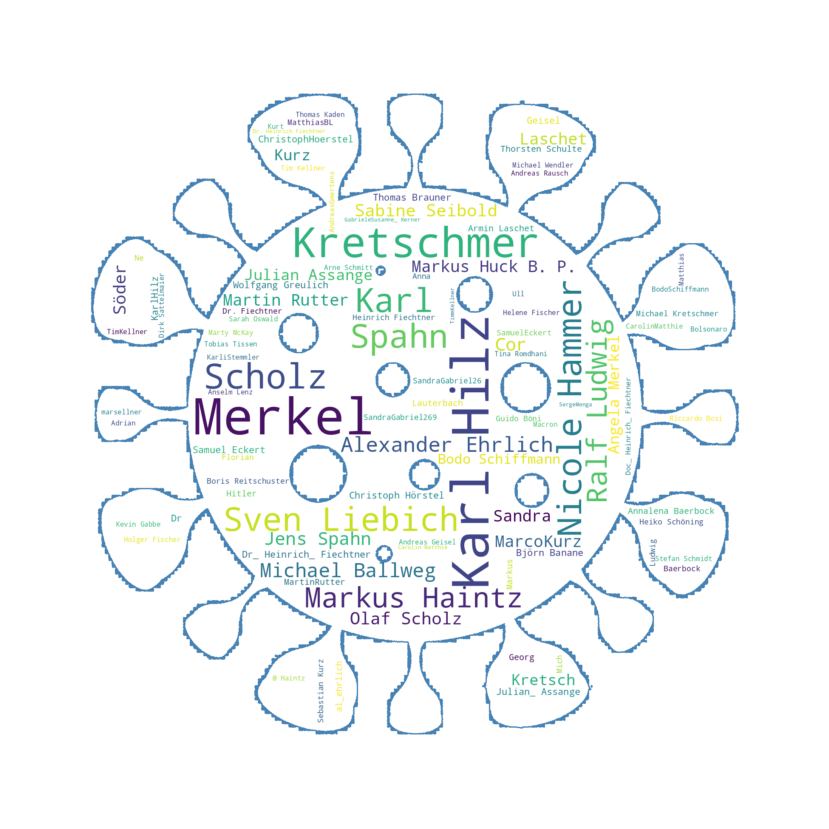

In [70]:
generate_word_cloud(ents_per_type, 'PER')

## Location names

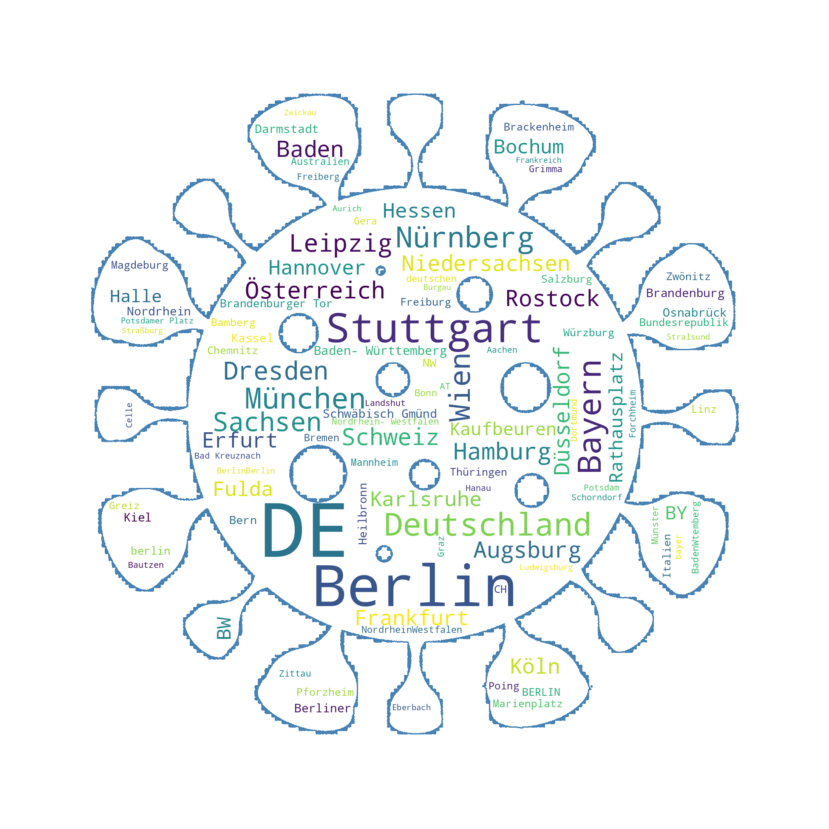

In [72]:
generate_word_cloud(ents_per_type, 'LOC')

## Organization names

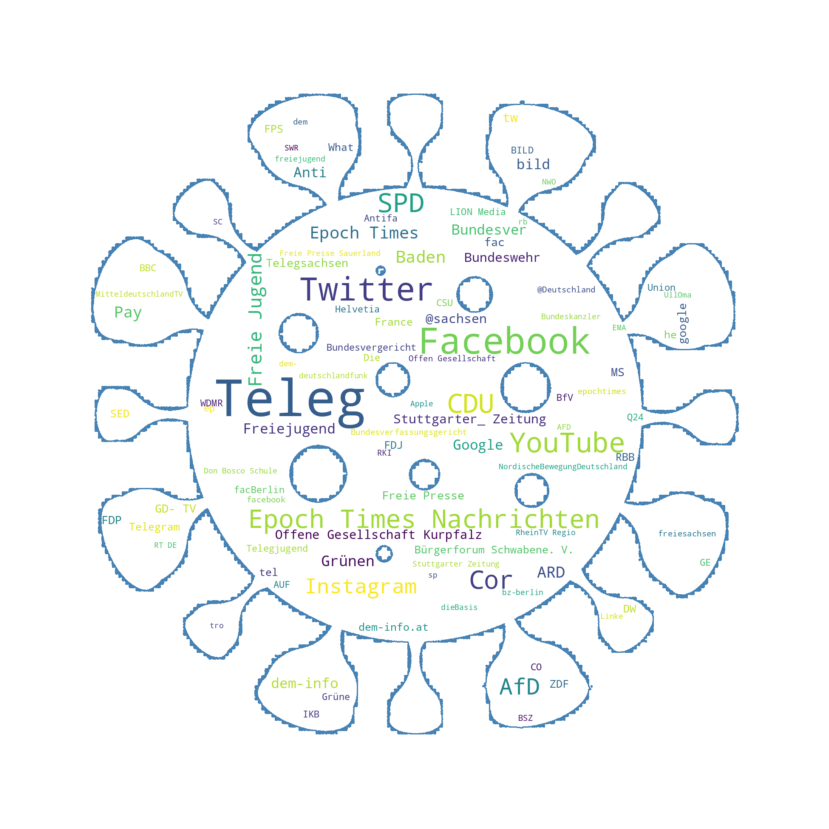

In [71]:
generate_word_cloud(ents_per_type, 'ORG')

## Date mentions

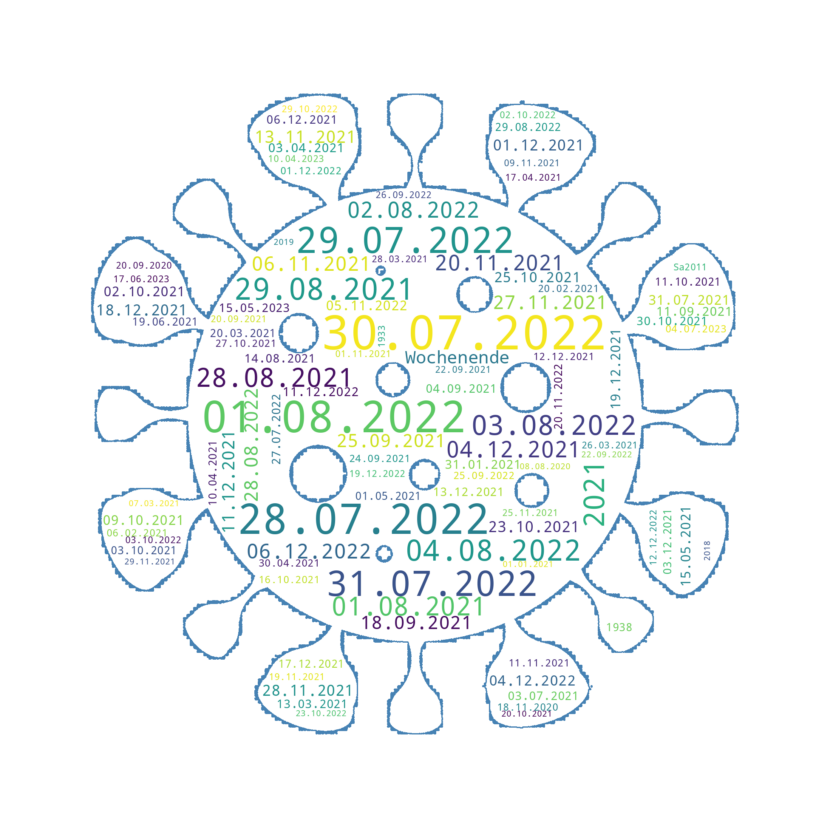

In [73]:
generate_word_cloud(ents_per_type, 'DATE')

## Time mentions

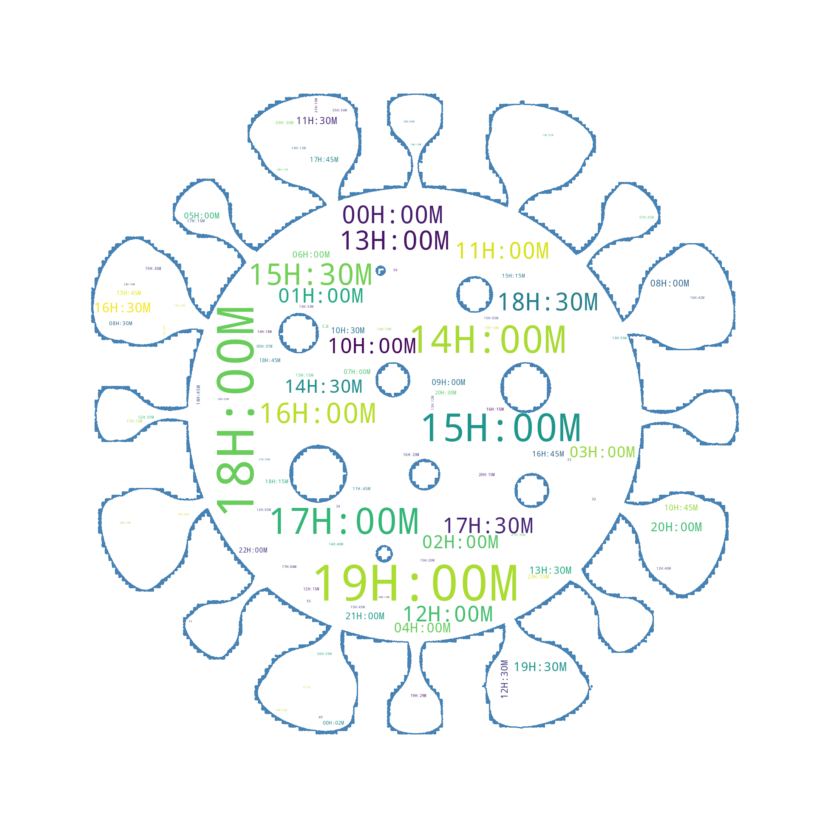

In [75]:
generate_word_cloud(ents_per_type, 'TIME')